In [1]:
import eilnn
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
from samples import particles
import sys
import cc3d

In [2]:
config = particles.ParticlesConfig()
subset = 'subset_25_test_only'
ROOT_DIR = os.path.abspath('C:/Users/Sohrab/Documents/crack/EILNet_tf2/')
sys.path.append(ROOT_DIR)
PARTICLE_DIR = os.path.join(ROOT_DIR, 'images',subset)
COCO_MODEL_PATH = 'C:/Users/Sohrab/Documents/crack/EILNet/mask_rcnn_coco.h5'

class InferenceConfig(config.__class__):
    GPU_COUNT = 1
    IMAGES_PER_GPU =1
    IMAGE_RESIZE_MODE = 'square'
    IMAGE_MIN_DIM = 768
    IMAGE_MAX_DIM = 1024
    LEARNING_RATE = 0.0001
    LEARNING_MOMENTUM = 0.9
    USE_MINI_MASK = False
    BATCH_SIZE=1
    VALIDATION_STEPS = 100
    NUM_CLASSES = 2
    
config_inference= InferenceConfig()
DEVICE = '/GPU:0'
TEST_MODE = 'inference'
def get_ax(rows=1, cols=1, size=16):
    _, ax = plt.subplots(rows,cols,figsize=(size*cols,size*rows))
    return ax


In [3]:
with tf.device(DEVICE):
    #changelogs
    model = modellib.MaskRCNN(mode='inference', config = config_inference, model_dir = 'C:/Users/Sohrab/Documents/crack/EILNet_tf2/logs')
model.load_weights(os.path.join(ROOT_DIR, 'C:/Users/Sohrab/Documents/crack/EILNet_tf2/logs/particles20210527T1350/mask_rcnn_particles_0435.h5'), by_name=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Re-starting from epoch 435


Loading images in: C:\Users\Sohrab\Documents\crack\EILNet_tf2\images\subset_25_test_only
Stack Dimensions  (702, 1024, 1004, 3)


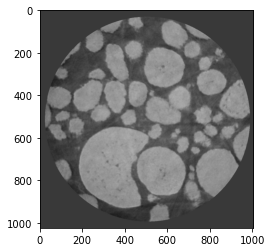

In [4]:
#segm = eilnn.Segment_3D(model, os.path.join(eilnn.IMAGES_DIR, 'test_gray_slices'), 2)
segm = eilnn.Segment_3D(model, PARTICLE_DIR, 3)

Segmentation took 17.6 minutes
Segmentation took 14.0 minutes
Segmentation took 13.2 minutes
grayscale(702, 1024, 1004, 3)
label(702, 1024, 1004)


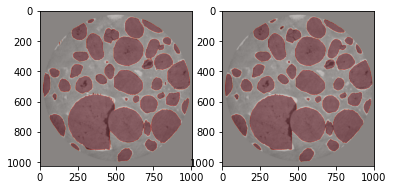

Done Distance Transform
Done Extended Minima


In [5]:
particles, background_val= segm.process_segm()

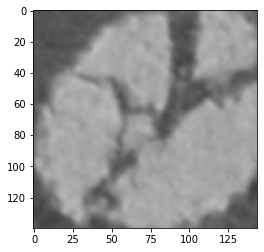

In [12]:
plt.imshow(particles[5][4,:,:])

In [13]:
print(particles[5].shape)

(5, 140, 144, 3)


In [ ]:
def classify_particles(model=1, data):
    for i, j in enumerate(data):
        middle_ix = int(j.shape[0])/2
        middle_slice = j[middle_ix,:,:]
        top_slice = j[middle_slice + 2,:,:]
        bottom_slice = j[middle_slice -2,:,:]
        
        

Loading images in: c:\users\sohrab\documents\crack\eil-nn\images\test_gray_slices
Stack Dimensions  (20, 1024, 1004, 3)


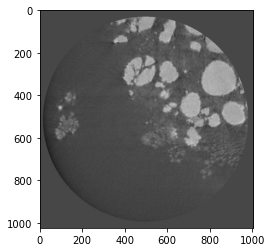

In [5]:
grayscale_stack = eilnn.load_grayscale(os.path.join(eilnn.IMAGES_DIR, 'test_gray_slices'))

In [7]:
eilnn.save_pickles(particles, 'particles.txt')

Saving particles.txt


In [6]:
print(background_val)

57


In [6]:
segmentation_2d = segm.segment_2d(model, grayscale_stack)

Segmentation took 0.2 minutes


In [7]:
print(segmentation_2d.shape)

(1024, 1004, 20)


In [8]:
segm_xz = segm.segment_xz(model, grayscale_stack)
segm_yz  = segm.segment_yz(model, grayscale_stack)

Segmentation took 4.7 minutes
Segmentation took 4.7 minutes


In [9]:
union = segm.union(segmentation_2d, segm_xz, segm_yz)


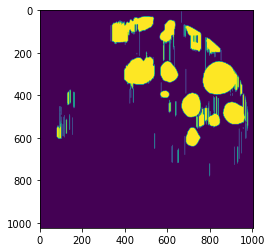

In [10]:
plt.imshow(union[:,:,10])

In [11]:
filtered_labels = segm.filtering(union)

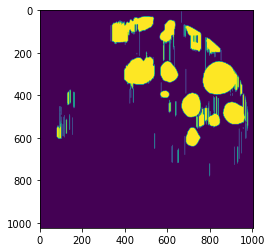

In [12]:
plt.imshow(union[:,:,10])

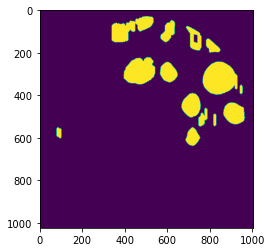

In [13]:
plt.imshow(filtered_labels[:,:,10])

In [14]:
W = segm.watershed_sep(union)

Done Distance Transform
Done Extended Minima


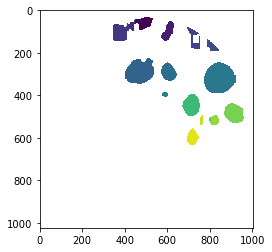

In [15]:
plt.imshow(W[:,:,10])

In [17]:
import cc3d

In [15]:
stats = cc3d.connected_components((W), connectivity =18)

In [16]:
bounding_boxes = stats['bounding_boxes']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [17]:
stats = cc3d.statistics(stats)

In [18]:
print(stats)

{'voxel_counts': array([18481915,    92676,    23764,   127921,    79121,    29998,
          88367,    62260,   123024,   306589,   409455,     7559,
           9388,    13332,   168751,     5258,     8086,     5884,
         181341,    48083,    28789,    31614,     4697,    27886,
          93659,    83051,    19452], dtype=uint64), 'bounding_boxes': [(slice(0, 1024.0, None), slice(0, 1004.0, None), slice(0, 20.0, None)), (slice(30, 219.0, None), slice(446, 536.0, None), slice(0, 20.0, None)), (slice(35, 115.0, None), slice(418, 448.0, None), slice(0, 20.0, None)), (slice(43, 164.0, None), slice(337, 423.0, None), slice(0, 20.0, None)), (slice(45, 241.0, None), slice(558, 635.0, None), slice(0, 20.0, None)), (slice(47, 185.0, None), slice(565, 636.0, None), slice(11, 20.0, None)), (slice(67, 201.0, None), slice(670, 764.0, None), slice(0, 19.0, None)), (slice(126, 238.0, None), slice(772, 856.0, None), slice(0, 20.0, None)), (slice(166, 341.0, None), slice(556, 651.0, None), slice(0